# William Wiemann

## Merging the two dataframe

When researching the diabetes database through Sklearn, I noticed they loaded the database as load_diabetes(return_X_y). Doing this returned my X and y. I added columns to the X dataframe, as none were present. 

Once I worked on the X dataframe, I added the disease_progression label to the y dataset, and merged the two dataframes into one. Doing this gave me a better visualization when using corr(). 

## Corresponding Values

I used a heatmap initially to see the corresponding values. We can see BMI has a large factor on the disease progression. I also posted scatter plots of the same sort of data.

## Linear Regression

I did a lot of research and found out the data is already preprocessed in the diabetes data set. I did not have to do much, prior for plotting Linear Regression. I split the data into four sets: X_train, X_test, y_train, y_test. This allows me to train a set of data and test it with the other part of the data set. I then used the LinearRegression.predict() to get the predicted values and plot them against the original.


In [81]:
from sklearn.datasets import load_diabetes
# Load the data
X, y = load_diabetes(return_X_y=True)

In [84]:
X.shape

(442, 1)

In [83]:
y.shape

X = pipeline.fit_transform(X)

(442,)

In [5]:
import pandas as pd
# The data given by sklearn has already been scaled and preprocessed. But missing columns
df1 = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
print(df1)

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

In [6]:
df2 = pd.DataFrame(y, columns=['disease_progression'])
print(df2)

     disease_progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [77]:
# Merge both DataFrames to see what correlates
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.describe()

In [78]:
# I decided to show both a heat map and scatter plot to show correlation
# As I like to see a heatmap, myself.
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, robust=True, annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='bp', ylabel='age'>,
        <AxesSubplot:xlabel='tc', ylabel='age'>,
        <AxesSubplot:xlabel='ldl', ylabel='age'>,
        <AxesSubplot:xlabel='hdl', ylabel='age'>,
        <AxesSubplot:xlabel='tch', ylabel='age'>,
        <AxesSubplot:xlabel='ltg', ylabel='age'>,
        <AxesSubplot:xlabel='glu', ylabel='age'>,
        <AxesSubplot:xlabel='disease_progression', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='bmi', ylabel='sex'>,
        <AxesSubplot:xlabel='bp', ylabel='sex'>,
        <AxesSubplot:xlabel='tc', ylabel='sex'>,
        <AxesSubplot:xlabel='ldl', ylabel='sex'>,
        <AxesSubplot:xlabel='hdl', ylabel='sex'>,
        <AxesSubplot:xlabel='tch', ylabel='sex'>,
        <AxesSubplot:xlabel='ltg', yl

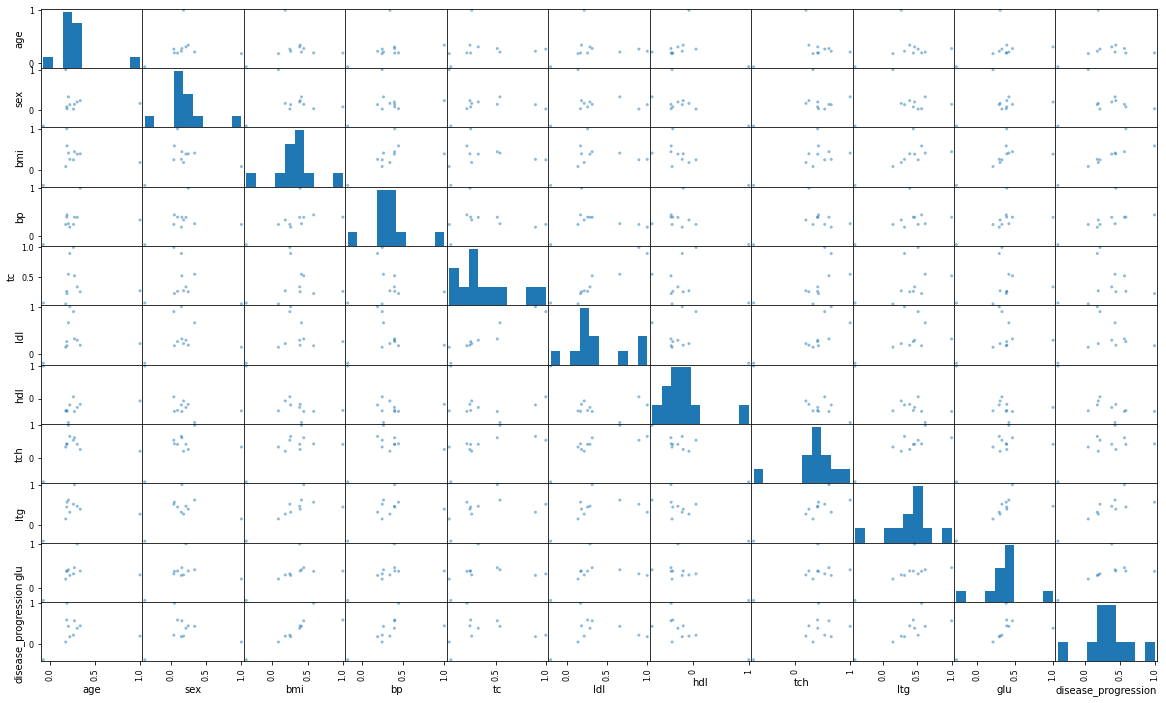

In [9]:
from pandas.plotting import scatter_matrix
corr = df.corr()
scatter_matrix(corr, figsize=(20,12))

In [55]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assigns column to X (highest correlation column - BMI)
X = df.iloc[:,2:3]
# Assigns column to y (disease progression)
y = df.iloc[:,-1]

# Split into validation set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 1), (89, 1), (353,), (89,))

In [49]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Fit the model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

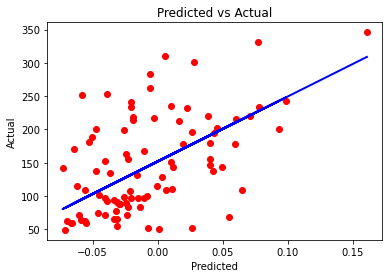

In [60]:
# Plot and predict the model
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin_reg.predict(X_test), color='blue', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()